## Lab Assignment Five: Wide and Deep Network

### Luis Garduno

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Brief Business Understanding

#### <ins>`About League of Legends`<ins>

Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer
video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue
&amp; 'Red') facing each other, where the main objective is to destroy the opposing
teams 'Nexus', or home base, while facing obstacles like destroying damage dealing
towers &amp; eliminating players throughout the way. Perks &amp; gold are able to be
obtained by players/teams through completing tasks such as eliminating players,
enemy creeps, or dragons. Players then spend the gold to purchase items that help
raise the power of their abilities.

League of Legends offers different game modes, such as ranked. In this game mode,
players are given a rank based off of the number of wins + the number of games
played. "Diamond" is one of the highest ranks a player may obtain and is known
to be extremely competitive. A ranked game on average lasts 30-45 minutes. The
dataset we will be using contains the first 10 minute analytics of each team
for different diamond ranked matches.

#### <ins>`Measure of Success`<ins>

Once the data is analyzed, third parties, or teams/players, would be able to conceptualize the level
of priority different attributes have during early stages of diamond ranked matches. With the first
ten minutes of each game being critical, they could then use this information to adjust their strategy
to one proven to win matches. In order for this data to be useful and trusted by third parties in
specific situations such as playing at professional level, the data would have to render at least a 80%
accuracy. The reason for it being 80% and not any higher is because as mentioned this data only include
the first 10 minutes of a game (average full game: 30-45 minutes). We leave a 20% error gap for any
changes of pace the winning team might have for the remaining time of the game (~67%).

Additionally, players who are accustomed to playing as the 'jungle' role (a player
role that focuses on obtaining objective eliminations within the jungle areas of
the map) can use this analyzed data to better understand the impact elite monsters
have on winning games.

-------------------------------------

Dataset [Kaggle]: <a href="https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min" target="_top"><b>First 10 minutes of diamond ranked League of Legends matches</b></a>

Question Of Interest : As of the first 10 minutes, which team will win?

## 1. Preparation

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Loading Data & Adjustments

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.1 Data Description

In [1]:
import numpy as np
import pandas as pd

# Load in the dataset into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/data/high_diamond_ranked_10min.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

---------------------------------

Printing out the information about the dataframe we are able to see that there are a
total of 9,879 instances, and 39 attributes.

Additionally we are able to see that there are 19 of the same attributes for each
the blue & red team (columns 1-19 are the same as 20-38).

Attributes for each team includes :
- Wards placed & destroyed
- Total number of kills, deaths, & assists
- First Bloods (1st elimination of the game)
- Total : towers destroyed, gold, experience
- Average : level, CS per minute, & gold per minute
- Difference in gold & experience between the teams
- Objective eliminations : elite monsters(dragons, heralds), minions, & jungle minions

Attributes such as total gold, experience, objectives eliminations, towers destroyed, etc.
will be of type integer (int64) because they will always be whole numbers. Attributes involving
averages such as cs per minute, gold per minute, & level, should be the only of double-precision floating-point
format (float64).

The data type for "blueWins" and "first bloods" could be changed to be of type boolean, but because we are wanting to
visualize these attributes later on, optimally it is best to keep these as integer data types. As a result,
the data types presented for each attribute are correct and should not be changed.

Below is a brief description of some of the key attributes.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df['blueVisionScore'] = (df['blueWardsPlaced'].values * df['blueWardsDestroyed'].values) % 10
df['redVisionScore'] = (df['redWardsPlaced'].values * df['redWardsDestroyed'].values) % 10

# Describe dataframe
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueVisionScore,redVisionScore
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,3.855147,3.897763
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,2.912674,2.904060
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000,0.000000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,1.000000,1.000000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,4.000000,4.000000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,6.000000,6.000000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,9.000000,9.000000


In [3]:
obj_kills = pd.DataFrame({'Task' : ['Max Dragon Kills', 'Max Herald Kills', 'Max Elite Monster Kills']})
obj_kills['RedTeam'] = [df.redDragons.max(), df.redHeralds.max(), df.redEliteMonsters.max()] 
obj_kills['BlueTeam'] = [df.blueDragons.max(), df.blueHeralds.max(), df.blueEliteMonsters.max()] 

obj_kills

,Task,RedTeam,BlueTeam
0,Max Dragon Kills,1,1
1,Max Herald Kills,1,1
2,Max Elite Monster Kills,2,2


After viewing the max values for these 3 variables, we see that it is unlikely for either team to kill more than 1 dragon or herald within the span of the first 10 minutes. So although both of these are technically numeric variables, we can model them to be categorical variables, so that we can use them as a boolean to answer the question of whether or not a team killed a dragon/herald:
- 0 = False, Team did not kill a dragon/herald
- 1 = True, Team killed a dragon/herald 

We leave _'EliteMonsterKills'_ to be a numeric type variable.

| Variable | Description | Type | Range |
| -------- | ----------- | ---- | ----- |
| **blueWins** (target) | whether blue team won or not | Discrete | [0] red team won; [1] blue team won; |
| WardsPlaced / WardsDestroyed | number of total wards placed or destroyed by team | Continuous | [placed] 5 - 250; [destroyed] 0 - 27 |
| FirstBlood | team with the first kill of game | Discrete | [0] did not get first kill; [1] team obtained first kill |
| Kills / Deaths / Assists | total number of kills, deaths, or assists of team | Continuous | [kills] 0 - 22; [deaths] 0 - 22; [assists] 0 - 29 |
| TowersDestroyed | total number of towers destroyed by team | Continuous | 0 - 2 |
| TotalGold | total gold obtained by team | Continuous | 11,000 - 25,000 |
| AvgLevel | average level of all players on team | Continuous | 4.5 - 8.5 |
| TotalExperience | total experience points accumulated by team | Continuous | 10,000 - 24,000 |
| CSPerMin | average creep score per minute | Continuous | 10.0 - 30.0 |
| GoldPerMin | average gold obtained per minute | Continuous | 1,100.0 - 2,000.0 |


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.2 Normalizing the Dataset

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# --- Scale the Numeric, continuous variables ---
numeric_headers = df.drop(['blueWins','blueFirstBlood','redFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds'], axis=1)

for column in numeric_headers:
    df[column] = df[column].astype(np.float)
    ss = StandardScaler()
    df[column] = ss.fit_transform(df[column].values.reshape(-1, 1))

# --- Encode the Categorical, discrete variables ---
encoders = dict()
categorical_headers = ['blueFirstBlood','redFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']

categorical_headers_int = []
for col in categorical_headers:
    col_name = col + '_int'
    encoders[col] = LabelEncoder()
    df[col_name] = encoders[col].fit_transform(df[col])
    categorical_headers_int.append(col_name)

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redCSPerMin,redGoldPerMin,blueVisionScore,redVisionScore,blueFirstBlood_int,redFirstBlood_int,blueDragons_int,blueHeralds_int,redDragons_int,redHeralds_int
0,0.691784,0,0.316996,-0.379275,1,0.935301,-0.046926,1.071495,-0.879231,0,...,-0.928741,0.052293,0.736423,-1.342245,1,0,0,0,0,0
1,0.844625,0,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.404768,-0.879231,0,...,1.033784,0.758619,-0.636955,-0.653519,0,1,0,0,1,1
2,0.775808,0,-0.404494,-1.298863,0,0.271042,1.657424,-0.650812,0.719503,1,...,-0.654900,0.533909,-1.323643,0.379570,0,1,1,0,0,0
3,0.881333,0,1.149484,-0.839069,0,-0.725346,-0.387796,-0.404768,0.719503,0,...,0.805583,-0.007406,-0.293610,-1.342245,0,1,0,1,0,0
4,-2.323029,0,2.925460,0.540312,0,-0.061087,-0.046926,-0.158724,-0.879231,0,...,0.349182,0.613731,-1.323643,0.035207,0,1,0,0,1,0



---------------

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.3 Data Quality

Using the `missingno` package, we are able to additionally confirm that all the data is complete
and there is no missing entries with the dataset. If there was missing data, we could impute the
missing values by using the k-nearest neighbor. But if an instance was missing a majority of its
attributes, it would be removed from the dataset.

The number of unique values in the column "gameId" is printed to verify that all instances
are weighted equally.

Number of unique values in column "gameId" :  9879
Duplicates :  0


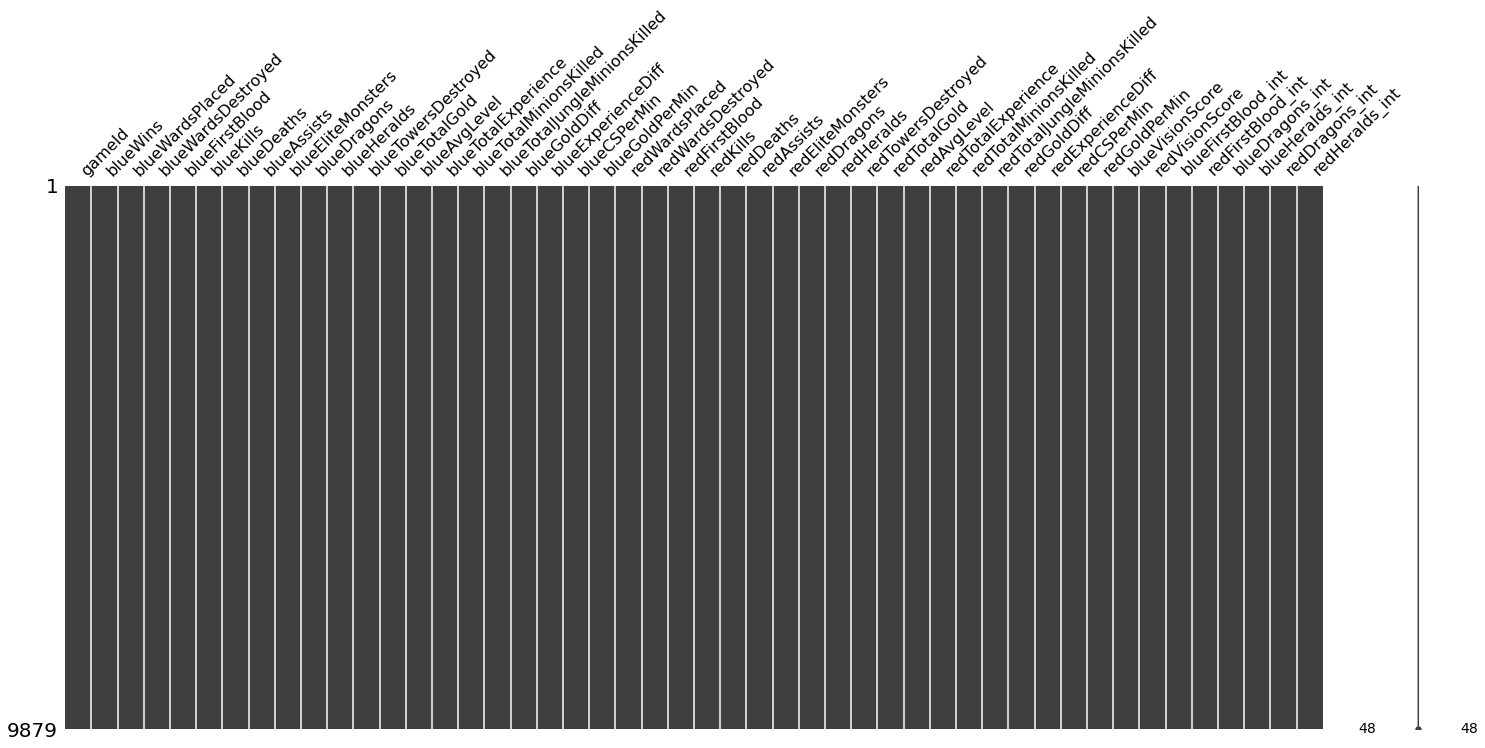

In [5]:
import missingno as mn

mn.matrix(df)

# Count unique values in column 'gameId' of the dataframe
print('Number of unique values in column "gameId" : ', df['gameId'].nunique())

dup_df = df.replace(to_replace=-1,value=np.nan)

dup_df = dup_df.duplicated()
print('Duplicates : ', len(df[dup_df]))


------------------------------

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.4 Cleaning the Dataset

After confirming there are no duplicates in the data, the "gameId" column can be removed since it
will have no impact on the results.

Using the correlation feature from the `pandas` package, for each team we find the names of
attributes that correlate most with winning (correlation >= 7%). The names of these attributes
are stored in a array for later use.

Lastly, two dataframes are created to hold the attributes at instances when blue team wins, and
when blue team loses.

In [6]:
del df['gameId']

red_col = df.corr()[df.corr()['blueWins'] <= -0.07].index.values
blue_col = df.corr()[df.corr()['blueWins'] >= 0.07].index.values

# Create dataframes for the 2 possible outcomes :
df_win  = df[df["blueWins"] == 1]     # Blue Team Win  /  Red Team Lost
df_lose = df[df["blueWins"] == 0]     # Red Team Win   /  Blue Team Lost


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 Finding & Creating Cross-Product Features

In [7]:
from copy import deepcopy

df_cross = deepcopy(df)

cross_columns = [['redFirstBlood', 'redDragons', 'redHeralds'],
                 ['blueFirstBlood','blueDragons', 'blueHeralds']]

cross_col_df_names = []
for col in cross_columns:
    enc = LabelEncoder()
    X = df[col].apply(lambda x: '_'.join(str(x)), axis=1)
    cross_col_name = '_'.join(col)
    enc.fit(np.hstack((X.to_numpy())))
    df_cross[cross_col_name] = enc.transform(X)
    cross_col_df_names.append(cross_col_name)

To provide some brief amount of justification towards the groups chosen & why they were not added towards the actual dataframe itself:
- 'FirstBlood's, 'Dragons', 'Heralds' : These three categorical columns for each team, from my perpective are one of the most impactful ones.
The 'FirstBlood' objective can be only obtained by one team per game. When a team completes this objective they receive a reward of gold coins that is then split between all of the team members. As for killing 'dragons' & 'heralds', this two objectives can be done by both teams with every game but it is very unlikely for both to do it within the span of the first 10 minutes of the game.


I decided to not further add these crossed columns to the dataframe after seeing the how significant the drop in accuracy was after running an initial model.


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 Measuring Algorithm Performance

Text(0, 0.5, 'Frequency')

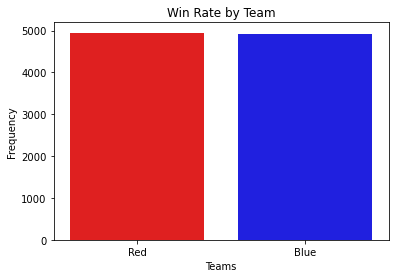

In [8]:
ax = sns.countplot(x="blueWins", data=df, palette=['red', 'blue'])
ax.set_title('Win Rate by Team')
ax.set_xlabel('Teams')
ax.set_xticks([0,1])
ax.set_xticklabels(['Red', 'Blue'])
ax.set_ylabel('Frequency')

- Choose & explain what metric(s) I will use to evaluate your algorithm’s performance.
- I should give a detailed argument for why this (these) metric(s) are appropriate on my data.
- That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task).
- Note: rarely is accuracy the best evaluation metric to use.Think deeply about an appropriate measure of performance.


-------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.4 Splitting the Dataset
Using Scikit-learn's
<a href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_top"><b>cross-validation modules</b></a>
we are able to split our dataset for training and testing purposes.

In [9]:
from sklearn.model_selection import train_test_split

# Create X data & y target dataframe's
if 'blueWins' in df:
    y = df['blueWins'].values
    del df['blueWins']
    X = df.to_numpy()
    X_cat = df[categorical_headers_int].to_numpy()

# Divide the data: 90% Training & 10% Testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)

print("Training Set", "\n   - Data Shape:",X_train.shape,"\n   - Target Shape:",y_train.shape)
print("\nTesting Set","\n   - Data Shape:",X_test.shape ,"\n   - Target Shape:",y_test.shape)

Training Set 
   - Data Shape: (8891, 46) 
   - Target Shape: (8891,)

Testing Set 
   - Data Shape: (988, 46) 
   - Target Shape: (988,)


-------------------

We perform a split within our dataset: 90% will be used for training, and 10% for testing. The 90/10 split is appropriate for
the dataset because recall that the end goal is for users to be able to determine the probabilities of them winning their
on-going game, or in other words we will only be predicting the win probability of __ONE__ game.

Additionally if a 95/5 split was applied it would also be appropriate to use as well. With League of Legends being a
strategy based game, our prediction algorithm essentially uses the training data to find which combination of
objectives/attributes have the biggest impact/correlation withing winning games. These game winning objectives/attributes could
be found quite early on during training, but we need to account that these objectives/attributes can be wrong in certain
instances due to the fact of the dataset only containing attributes for the first 10 minutes. So as the size of the training
set increases, the amount of fine-tunning performed increases, thus rendering a higher accuracy when predicting through the
testing dataset.

In [10]:
# - Choose the method I will use for dividing my data into training & testing


- Explain what i'm using & why (i.e Stratified 10-fold cross validation? Shuffle splits?)
- Explain why my chosen method is appropriate or use more than one method as appropriate.
- Argue why my cross validation method is a realistic mirroring of how an algorithm would be used in practice. 



--------------------------

## 2. Modeling


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Creating Wide & Deep Networks

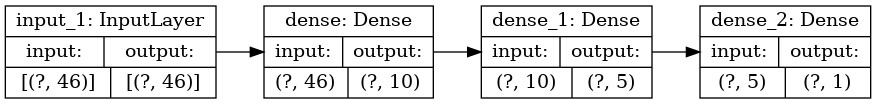

In [11]:
# - Create at least 3 combined wide & deep networks to classify your data using Keras.
from tensorflow import keras
from sklearn import metrics as mt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Activation, Input

input_tensor = Input(shape=(X_train.shape[1],))
x = Dense(units=10, activation='relu')(input_tensor)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_tensor, outputs=predictions)

model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,rankdir='LR', expand_nested=False, dpi=96)

In [12]:
%%time

history1 = model.fit(X_train, y_train, epochs=15, batch_size=5, verbose=1, validation_data=(X_test, y_test))

yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.1934 - accuracy: 0.7037 - val_loss: 0.1880 - val_accuracy: 0.7176
Epoch 2/15
1779/1779 [==============================] - 7s 4ms/step - loss: 0.1831 - accuracy: 0.7261 - val_loss: 0.1869 - val_accuracy: 0.7227
Epoch 3/15
1779/1779 [==============================] - 7s 4ms/step - loss: 0.1814 - accuracy: 0.7262 - val_loss: 0.1866 - val_accuracy: 0.7227
Epoch 4/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.1804 - accuracy: 0.7294 - val_loss: 0.1867 - val_accuracy: 0.7237
Epoch 5/15
1779/1779 [==============================] - 8s 4ms/step - loss: 0.1796 - accuracy: 0.7300 - val_loss: 0.1866 - val_accuracy: 0.7227
Epoch 6/15
1779/1779 [==============================] - 7s 4ms/step - loss: 0.1789 - accuracy: 0.7315 - val_loss: 0.1865 - val_accuracy: 0.7196
Epoch 7/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.1782 - accuracy: 0.7318 - val_loss: 0.1871 - val_accuracy:

In [13]:
# - Visualize the performance of the network on the training data & validation data in:
# - the same plot
# - vs.
# - training iterations.
# - Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

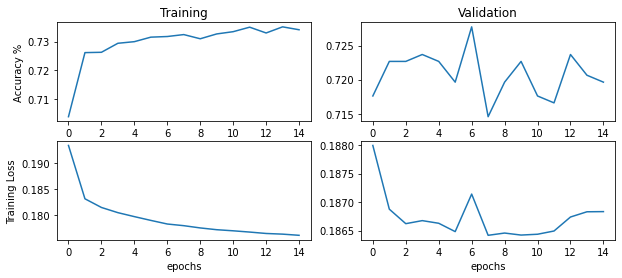

In [14]:
def getCharts(history):
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['accuracy'])
    
    plt.ylabel('Accuracy %')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation')
    
    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')

getCharts(history1)


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Investigating Generalization Performance

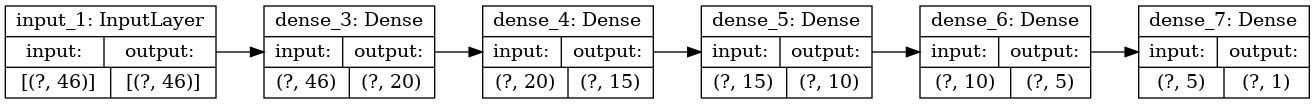

In [15]:
# Create X data & y target dataframe's
if 'blueWins' in df:
    y = df_cross['blueWins'].values
    del df_cross['blueWins']
    X = df_cross.to_numpy()
    #X_cat = df[categorical_headers_int].to_numpy()

# Divide the data: 90% Training & 10% Testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)

# - Investigate generalization performance by altering the number of layers in the deep branch of the network.
# - Try at least 2 different number of layers.
x = Dense(units=20, activation='relu')(input_tensor)
x = Dense(units=15, activation='relu')(x)
x = Dense(units=10, activation='relu')(x)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_tensor, outputs=predictions)

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

In [16]:
%%time

history2 = model.fit(X_train, y_train, epochs=15, batch_size=5, verbose=1, validation_data=(X_test, y_test))

yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
1779/1779 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.5322 - val_loss: 0.2337 - val_accuracy: 0.6447
Epoch 2/15
1779/1779 [==============================] - 9s 5ms/step - loss: 0.2040 - accuracy: 0.7154 - val_loss: 0.1968 - val_accuracy: 0.6984
Epoch 3/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.1862 - accuracy: 0.7266 - val_loss: 0.1931 - val_accuracy: 0.7146
Epoch 4/15
1779/1779 [==============================] - 9s 5ms/step - loss: 0.1833 - accuracy: 0.7287 - val_loss: 0.1912 - val_accuracy: 0.7176
Epoch 5/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.1815 - accuracy: 0.7316 - val_loss: 0.1900 - val_accuracy: 0.7085
Epoch 6/15
1779/1779 [==============================] - 8s 4ms/step - loss: 0.1803 - accuracy: 0.7302 - val_loss: 0.1891 - val_accuracy: 0.7105
Epoch 7/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.1792 - accuracy: 0.7315 - val_loss: 0.1894 - val_accuracy:

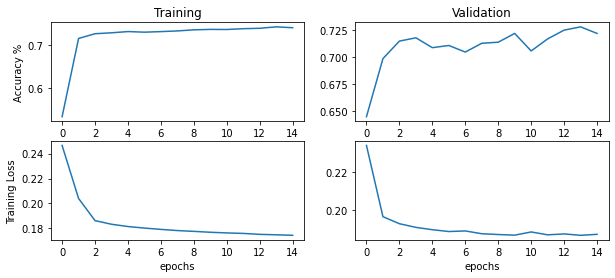

In [17]:
getCharts(history2)

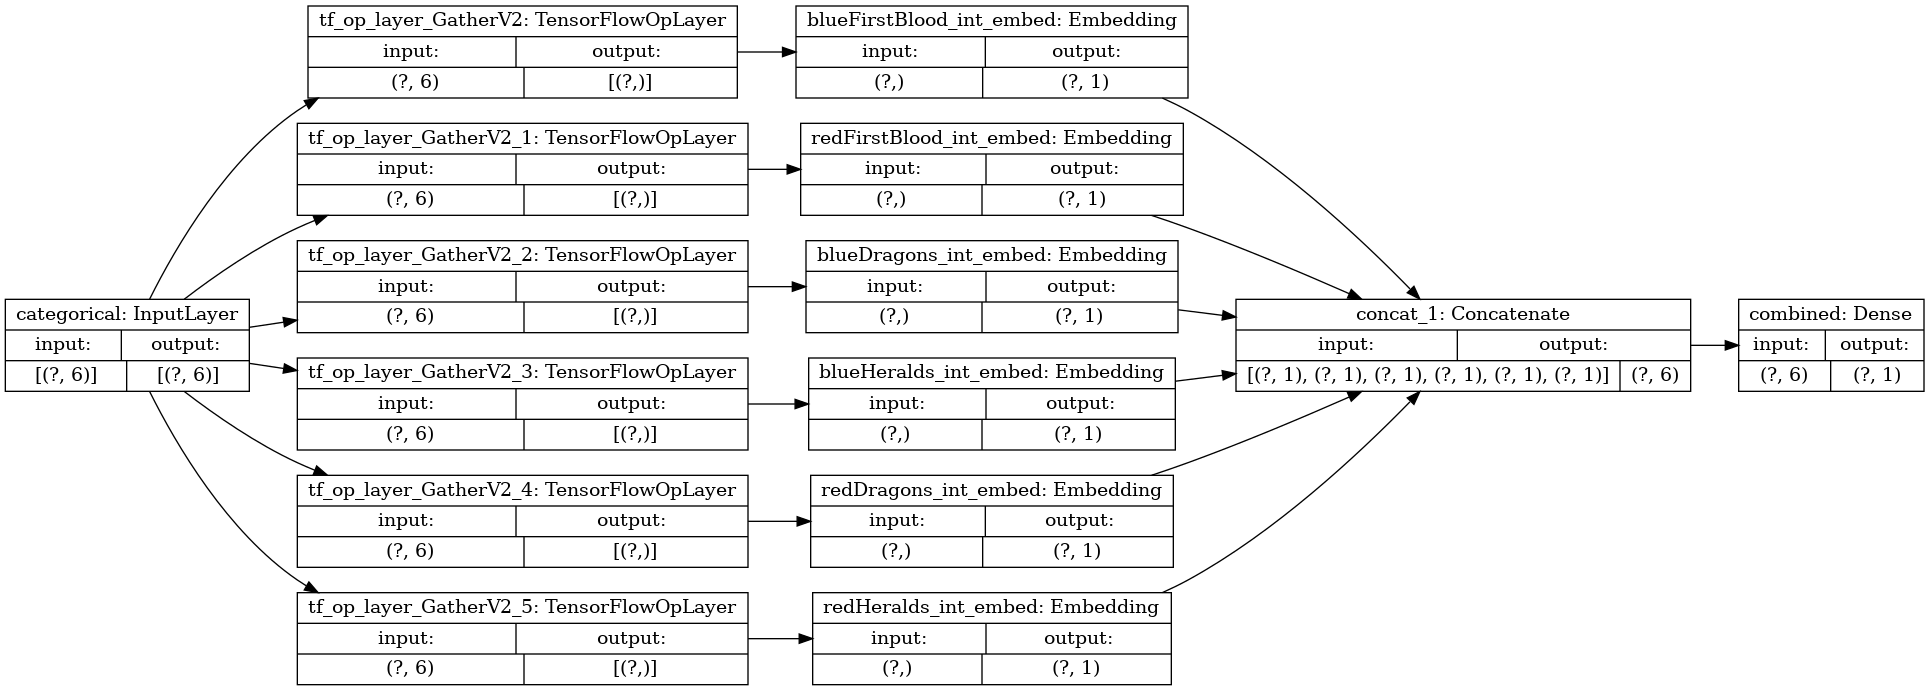

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate

# Create X data & y target dataframe's
if 'blueWins' in df:
    y = df['blueWins'].values
    del df['blueWins']
    X_cat = df[categorical_headers_int].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_cat, y, train_size=0.9, test_size=0.1, random_state=0)

embed_branches = []
all_branch_outputs = []
input_branch = Input(shape=(X_train.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers_int):
    x = tf.gather(input_branch, idx, axis=1)
    x = Embedding(input_dim=2, output_dim=int(np.sqrt(2)), input_length=1, name=col+'_embed')(x)
    all_branch_outputs.append(x)
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1, activation='relu', name='combined')(final_branch)
model = Model(inputs=input_branch, outputs=final_branch)

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

In [19]:
%%time

history3 = model.fit(X_train, y_train, epochs=15, batch_size=5, verbose=1, validation_data=(X_test, y_test))

yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/15
1779/1779 [==============================] - 8s 5ms/step - loss: 0.2318 - accuracy: 0.6176 - val_loss: 0.2314 - val_accuracy: 0.6144
Epoch 2/15
1779/1779 [==============================] - 9s 5ms/step - loss: 0.2290 - accuracy: 0.6216 - val_loss: 0.2317 - val_accuracy: 0.6093
Epoch 3/15
1779/1779 [==============================] - 9s 5ms/step - loss: 0.2286 - accuracy: 0.6246 - val_loss: 0.2288 - val_accuracy: 0.6154
Epoch 4/15
1779/1779 [==============================] - 8s 4ms/step - loss: 0.2282 - accuracy: 0.6277 - val_loss: 0.2302 - val_accuracy: 0.6154
Epoch 5/15
1779/1779 [==============================] - 9s 5ms/step - loss: 0.2286 - accuracy: 0.6286 - val_loss: 0.2288 - val_accuracy: 0.6235
Epoch 6/15
1779/1779 [==============================] - 10s 6ms/step - loss: 0.2279 - accuracy: 0.6259 - val_loss: 0.2284 - val_accuracy: 0.6285
Epoch 7/15
1779/1779 [==============================] - 9s 5ms/step - loss: 0.2282 - accuracy: 0.6263 - val_loss: 0.2306 - val_accuracy

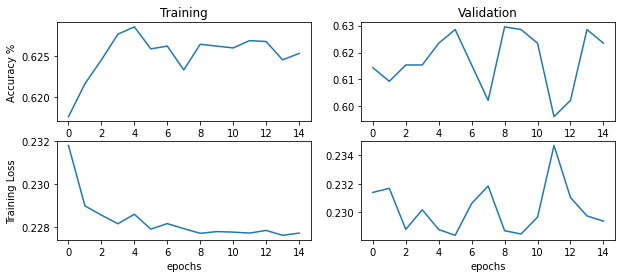

In [20]:
# - Use the method of cross validation & evaluation metric I chose at the start of the lab to help select
#   the # of layers that performs superiorly. 
getCharts(history3)


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Comparing Performaces

- Use proper statistical method to compare the performance of different models.  

In [21]:
# - Compare the performance of my best wide & deep network to a standard multi-layer perceptron (MLP).

In [22]:
# - For classification tasks, use the receiver operating characteristic & area under the curve.

In [23]:
#- For regression tasks, use Bland-Altman plots & residual variance calculations.

Reference

----------------

#### References

Kaggle. League of Legends Diamond Ranked Games (First 10 Minutes).
https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min (Accessed 4-15-2021)